In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('winequality.csv', sep=';')

In [52]:
sub_dados = dados.copy()

In [53]:
sub_dados.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [54]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


In [55]:
types_wine = sub_dados.type.unique()

In [56]:
dict_type = {}
for i, _type in enumerate(types_wine):
    dict_type[_type] = i
dict_type

{'White': 0, 'Red': 1}

In [57]:
# Não há necessidade da coluna volatile acidity
# A coluna quality é a variável Y
# A coluna Type e alcohol precisa ser pré-processada
# y = quality
# x= todo restante


In [58]:
dados.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

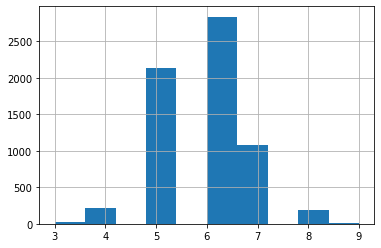

In [59]:
dados.quality.hist()

In [60]:
for i in range(0, len(sub_dados)):
    # print(sub_dados.loc[i, 'type'])
    sub_dados.loc[i, 'type'] = dict_type[sub_dados.loc[i, 'type']]

In [61]:
sub_dados.type.value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [64]:
# Quality
# 0 - Ruim
# 1 Ótimo
#for i in range(0, len(sub_dados)):
#    if sub_dados.loc[i, 'quality'] < 6:
#        sub_dados.loc[i, 'quality'] = 0
#    else:
#        sub_dados.loc[i, 'quality'] = 1
sub_dados.quality = [ 0 if i < 6 else 1  for i in sub_dados.quality]

In [67]:
sub_dados.quality.value_counts()

1    4113
0    2384
Name: quality, dtype: int64

In [73]:
def check_is_num(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

In [128]:
is_number = [ check_is_num(a) for a in sub_dados.alcohol]


In [137]:
vinhos_copia_2 = sub_dados.loc[is_number,:]

In [138]:
vinhos_copia_2.alcohol = [ float(v) for v in vinhos_copia_2.alcohol]

In [139]:
vinhos_copia_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 13 columns):
type                    6457 non-null int64
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
dtypes: float64(11), int64(2)
memory usage: 706.2 KB


### Criar X e Y

In [151]:
columns_x = ['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
columns_x

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [152]:
x = vinhos_copia_2.loc[:, columns_x]

In [153]:
y = vinhos_copia_2.loc[:, 'quality']

### Bases de treino e teste

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [145]:
x_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4519 entries, 2316 to 860
Data columns (total 12 columns):
type                    4519 non-null int64
fixed acidity           4519 non-null float64
volatile acidity        4519 non-null float64
citric acid             4519 non-null float64
residual sugar          4519 non-null float64
chlorides               4519 non-null float64
free sulfur dioxide     4519 non-null float64
total sulfur dioxide    4519 non-null float64
density                 4519 non-null float64
pH                      4519 non-null float64
sulphates               4519 non-null float64
alcohol                 4519 non-null float64
dtypes: float64(11), int64(1)
memory usage: 459.0 KB


In [146]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 1480 to 937
Data columns (total 12 columns):
type                    1938 non-null int64
fixed acidity           1938 non-null float64
volatile acidity        1938 non-null float64
citric acid             1938 non-null float64
residual sugar          1938 non-null float64
chlorides               1938 non-null float64
free sulfur dioxide     1938 non-null float64
total sulfur dioxide    1938 non-null float64
density                 1938 non-null float64
pH                      1938 non-null float64
sulphates               1938 non-null float64
alcohol                 1938 non-null float64
dtypes: float64(11), int64(1)
memory usage: 196.8 KB


### Treinar o modelo

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
dt = DecisionTreeClassifier(random_state=42)

In [149]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [150]:
dt.fit(x_treino, y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [155]:
previsao = dt.predict(x_test)

In [156]:
previsao

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

### Avaliar o modelo

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [166]:
confusion_matrix(y_true=y_test, y_pred=previsao, labels=[0, 1])

array([[ 511,  193],
       [ 229, 1005]], dtype=int64)

In [167]:
accuracy_score(y_true=y_test, y_pred=previsao)

0.782249742002064

In [168]:
recall_score(y_true=y_test, y_pred=previsao)

0.8144246353322528

In [169]:
precision_score(y_true=y_test, y_pred=previsao)

0.83889816360601

In [170]:
import joblib

In [171]:
dic_save_model = dict({
    'model': dt,
    'metadata': {
        'description': 'Arvore de decisão, Qualidade de vinhos',
        'author': 'Bleno S.',
        'date': '2020-02-05',
        'source_code_version': '0.1',
        'tratamento_dados': 'Transformado todos os dados para numérico'\
        'usando a coluna quality como y'
    }
})

In [172]:
joblib.dump(dic_save_model, 'wine_quality.joblib')

['wine_quality.joblib']